In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
 
from matplotlib import pyplot as plt
 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
data = pd.read_csv('new_data.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,South of Market,4,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0
1,1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,South of Market,3,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0
2,2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,Potrero Hill,6,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0
3,3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0
4,4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0


In [3]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,1.133000e+04
mean,5664.500000,9171.729214,1.980229,2.614475,1586.962556,1.263928e+06,37.759710,-122.436517,6.112268,1948.498147,1.565695e+06,94116.912004,3.689973e+07
std,3270.833609,4921.941074,1.047358,1.299457,923.456020,1.042079e+06,0.025578,0.030743,12.125303,37.911196,1.229417e+06,9.400877,7.800741e+07
min,0.000000,2.000000,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,94102.000000,1.506329e+07
25%,2832.250000,5039.750000,1.000000,2.000000,1020.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,94110.000000,1.510847e+07
50%,5664.500000,9198.500000,2.000000,2.000000,1364.500000,9.900000e+05,37.760508,-122.432510,5.000000,1940.000000,1.230758e+06,94115.000000,1.515697e+07
75%,8496.750000,13374.750000,2.000000,3.000000,1879.000000,1.450000e+06,37.781386,-122.413367,7.000000,1986.000000,1.731170e+06,94123.000000,5.970040e+07
max,11329.000000,17632.000000,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,94158.000000,2.146999e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     11330 non-null  int64  
 1   Unnamed: 0.1   11330 non-null  int64  
 2   address        11330 non-null  object 
 3   z_address      11330 non-null  object 
 4   bathrooms      11330 non-null  float64
 5   bedrooms       11330 non-null  float64
 6   finishedsqft   11330 non-null  float64
 7   lastsolddate   11330 non-null  object 
 8   lastsoldprice  11330 non-null  float64
 9   latitude       11330 non-null  float64
 10  longitude      11330 non-null  float64
 11  neighborhood   11330 non-null  object 
 12  totalrooms     11330 non-null  int64  
 13  usecode        11330 non-null  object 
 14  yearbuilt      11330 non-null  float64
 15  zestimate      11330 non-null  float64
 16  zindexvalue    11330 non-null  object 
 17  zipcode        11330 non-null  float64
 18  zpid  

In [5]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'address', 'z_address', 'bathrooms',
       'bedrooms', 'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [6]:
data.dropna().shape

(11330, 19)

In [7]:
def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [8]:
cols = ['Unnamed: 0', 'bathrooms', 'bedrooms',
       'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'totalrooms','yearbuilt','zipcode']
cols2 = ['Unnamed: 0', 'bathrooms', 'bedrooms',
       'finishedsqft', 'latitude',
       'longitude', 'totalrooms','yearbuilt','zipcode']

In [12]:
get_score(data.dropna()[cols], data.dropna()['zestimate'])

0.8604348481609186

In [13]:
get_score(data.dropna()[cols2], data.dropna()['zestimate'])

0.6555198750088491

###### Оставляю в датасете только размеры жилья, кол-во ванн и комнат, также район (neighborhood), так как от нейборхуда часто зависит цена, это не всегда даже кореллирует с криминалом, важны другие факторы также (их в датасете нет). 

In [48]:
cols3 = ['bathrooms',
       'bedrooms', 'finishedsqft', 'lastsoldprice', 'totalrooms',
        'yearbuilt', 'neighborhood']

###### прнименяю Лэйблэнкодинг для "нейборхуд"

In [49]:
le = preprocessing.LabelEncoder()
data['neighborhood'] = le.fit_transform(data['neighborhood'])

In [50]:
data.head()

,Unnamed: 0,Unnamed: 0.1,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,per_sqrf
0,0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,59,4,Condominium,2007.0,1167508.0,"975,700",94103.0,83152781.0,1246.404602
1,1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,59,3,Condominium,2004.0,823719.0,"975,700",94107.0,69819817.0,830.564784
2,2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,53,6,Condominium,2003.0,1708594.0,"1,277,600",94107.0,64972847.0,1049.122807
3,3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,53,10,SingleFamily,1927.0,2411236.0,"1,277,600",94107.0,15149489.0,1210.219632
4,4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,1,4,SingleFamily,1900.0,1918539.0,"1,248,000",94110.0,15161978.0,1176.923077


In [51]:
get_score(data.dropna()[cols3], data.dropna()['zestimate'])

0.8383028573535806

###### мой score на выходе 0,838

######  хочу теперь попробовать цену разделить на количество футов площади, чтобы получить цену за кв фут 

In [52]:
per_sqrf = (data['lastsoldprice']/data['finishedsqft'])
        

In [63]:
data['per_sqrf'] = per_sqrf
data.head()

,Unnamed: 0,Unnamed: 0.1,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,per_sqrf
0,0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,59,4,1,2007.0,1167508.0,"975,700",94103.0,83152781.0,1246.404602
1,1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,59,3,1,2004.0,823719.0,"975,700",94107.0,69819817.0,830.564784
2,2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,53,6,1,2003.0,1708594.0,"1,277,600",94107.0,64972847.0,1049.122807
3,3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,53,10,8,1927.0,2411236.0,"1,277,600",94107.0,15149489.0,1210.219632
4,4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,1,4,8,1900.0,1918539.0,"1,248,000",94110.0,15161978.0,1176.923077


###### проверяю версию цена за кв фут, год постройки и район

In [54]:
cols4 = ['per_sqrf',
        'yearbuilt', 'neighborhood']

In [55]:
get_score(data.dropna()[cols4], data.dropna()['zestimate'])

0.04744835820452897

###### показатель значительно хуже  ^|   0.04744835820452897

In [58]:
cols5 = ['per_sqrf',
        'yearbuilt', 'zipcode',
        'totalrooms', 'bedrooms', 'bathrooms']

In [59]:
get_score(data.dropna()[cols5], data.dropna()['zestimate'])

0.3545140975426835

In [60]:
le2 = preprocessing.LabelEncoder()
data['usecode'] = le2.fit_transform(data['usecode'])

In [61]:
data.head()

,Unnamed: 0,Unnamed: 0.1,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,per_sqrf
0,0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,59,4,1,2007.0,1167508.0,"975,700",94103.0,83152781.0,1246.404602
1,1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,59,3,1,2004.0,823719.0,"975,700",94107.0,69819817.0,830.564784
2,2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,53,6,1,2003.0,1708594.0,"1,277,600",94107.0,64972847.0,1049.122807
3,3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,53,10,8,1927.0,2411236.0,"1,277,600",94107.0,15149489.0,1210.219632
4,4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,1,4,8,1900.0,1918539.0,"1,248,000",94110.0,15161978.0,1176.923077


In [64]:
cols6 = ['bathrooms',
       'bedrooms', 'finishedsqft', 'lastsoldprice', 'totalrooms',
        'yearbuilt', 'neighborhood', 'usecode']

In [65]:
get_score(data.dropna()[cols6], data.dropna()['zestimate'])

0.839368666975146

###### cols6  выглядит лучше чем  cols3 , 0,839 против 0,838 , улучшилось за счет добавления колонки "вид использования"

In [68]:
one_hot = pd.get_dummies(data['neighborhood'])

In [76]:
get_score(one_hot, data.dropna()['zestimate'])

0.33043701925710134

In [72]:
data.head()

,Unnamed: 0,Unnamed: 0.1,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,per_sqrf
0,0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,-122.412635,59,4,1,2007.0,1167508.0,"975,700",94103.0,83152781.0,1246.404602
1,1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,-122.393417,59,3,1,2004.0,823719.0,"975,700",94107.0,69819817.0,830.564784
2,2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,-122.396516,53,6,1,2003.0,1708594.0,"1,277,600",94107.0,64972847.0,1049.122807
3,3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,-122.396769,53,10,8,1927.0,2411236.0,"1,277,600",94107.0,15149489.0,1210.219632
4,4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,-122.413453,1,4,8,1900.0,1918539.0,"1,248,000",94110.0,15161978.0,1176.923077


In [99]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'address', 'z_address', 'bathrooms',
       'bedrooms', 'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
       'zestimate', 'zindexvalue', 'zipcode', 'zpid', 'per_sqrf'],
      dtype='object')

In [109]:
cols7 = [ 'bathrooms',
       'bedrooms', 'finishedsqft', 'lastsoldprice', 'latitude',
       'longitude', 'neighborhood', 'totalrooms', 'usecode', 'yearbuilt',
         'zipcode',  'per_sqrf']

In [110]:
get_score(data.dropna()[cols7], data.dropna()['zestimate'])

0.8498040143489464

###### max score 0.8498 с переменной col7

<AxesSubplot:xlabel='neighborhood', ylabel='zestimate'>

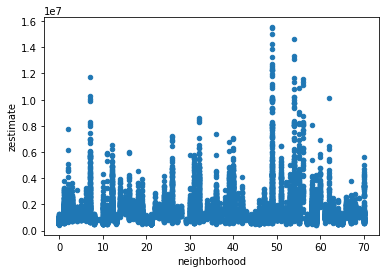

In [129]:
data.plot.scatter('neighborhood', 'zestimate')

<AxesSubplot:xlabel='zipcode', ylabel='zestimate'>

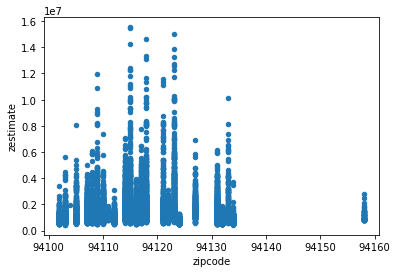

In [130]:
data.plot.scatter('zipcode', 'zestimate')

###### создаем районы

In [131]:
from sklearn.cluster import DBSCAN, KMeans

In [133]:
len(data['neighborhood'].unique())

71

In [135]:
kmeans = KMeans(n_clusters=71)
cluster = kmeans.fit_predict(data[['latitude', 'longitude']])

In [136]:
data['cluster'] = cluster

In [137]:
data.head()

,Unnamed: 0,Unnamed: 0.1,address,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,...,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid,per_sqrf,cluster
0,0,2,Address: 1160 Mission Street #2007,1160 Mission St UNIT 2007,2.0,2.0,1043.0,02/17/2016,1300000.0,37.778705,...,59,4,1,2007.0,1167508.0,"975,700",94103.0,83152781.0,1246.404602,24
1,1,5,Address: 260 King Street #475,260 King St UNIT 475,1.0,1.0,903.0,02/17/2016,750000.0,37.777641,...,59,3,1,2004.0,823719.0,"975,700",94107.0,69819817.0,830.564784,45
2,2,7,Address: 560 Missouri Street #B,560 Missouri St # B,4.0,3.0,1425.0,02/17/2016,1495000.0,37.759198,...,53,6,1,2003.0,1708594.0,"1,277,600",94107.0,64972847.0,1049.122807,46
3,3,9,Address: 350 Missouri Street,350 Missouri St,3.0,3.0,2231.0,02/17/2016,2700000.0,37.761886,...,53,10,8,1927.0,2411236.0,"1,277,600",94107.0,15149489.0,1210.219632,46
4,4,11,Address: 3658 Folsom Street,3658 Folsom St,3.0,3.0,1300.0,02/17/2016,1530000.0,37.740795,...,1,4,8,1900.0,1918539.0,"1,248,000",94110.0,15161978.0,1176.923077,62


#### добавим криминал

In [111]:
police_data = pd.read_csv('Police_Department_Incident_Reports__2018_to_Present.csv')

In [112]:
police_data.head()

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,HSOC Zones as of 2018-06-05,OWED Public Spaces,Central Market/Tenderloin Boundary Polygon - Updated,Parks Alliance CPSI (27+TL sites),ESNCAG - Boundary File,"Areas of Vulnerability, 2016"
0,2020/02/03 02:45:00 PM,2020/02/03,14:45,2020,Monday,2020/02/03 05:50:00 PM,89881675000,898816,200085557,200342870.0,...,41.0,10.0,8.0,16.0,NaN,NaN,NaN,NaN,NaN,2.0
1,2020/02/03 03:45:00 AM,2020/02/03,03:45,2020,Monday,2020/02/03 03:45:00 AM,89860711012,898607,200083749,200340316.0,...,53.0,3.0,2.0,20.0,3.0,NaN,NaN,NaN,NaN,2.0
2,2020/02/03 10:00:00 AM,2020/02/03,10:00,2020,Monday,2020/02/03 10:06:00 AM,89867264015,898672,200084060,200340808.0,...,19.0,5.0,3.0,8.0,NaN,35.0,NaN,NaN,NaN,2.0
3,2020/01/19 05:12:00 PM,2020/01/19,17:12,2020,Sunday,2020/02/01 01:01:00 PM,89863571000,898635,206024187,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020/01/05 12:00:00 AM,2020/01/05,00:00,2020,Sunday,2020/02/03 04:09:00 PM,89877368020,898773,200085193,200342341.0,...,103.0,4.0,6.0,30.0,NaN,NaN,NaN,NaN,NaN,1.0


In [113]:
police_data.columns

Index(['Incident Datetime', 'Incident Date', 'Incident Time', 'Incident Year',
       'Incident Day of Week', 'Report Datetime', 'Row ID', 'Incident ID',
       'Incident Number', 'CAD Number', 'Report Type Code',
       'Report Type Description', 'Filed Online', 'Incident Code',
       'Incident Category', 'Incident Subcategory', 'Incident Description',
       'Resolution', 'Intersection', 'CNN', 'Police District',
       'Analysis Neighborhood', 'Supervisor District', 'Latitude', 'Longitude',
       'point', 'SF Find Neighborhoods', 'Current Police Districts',
       'Current Supervisor Districts', 'Analysis Neighborhoods',
       'HSOC Zones as of 2018-06-05', 'OWED Public Spaces',
       'Central Market/Tenderloin Boundary Polygon - Updated',
       'Parks Alliance CPSI (27+TL sites)', 'ESNCAG - Boundary File',
       'Areas of Vulnerability, 2016'],
      dtype='object')

In [120]:
crime_location = police_data[['Incident Category', 'Latitude', 'Longitude',
       'point', 'Analysis Neighborhoods'
                              
       ]]
crime_location

,Incident Category,Latitude,Longitude,point,Analysis Neighborhoods
0,Missing Person,37.726950,-122.476039,"(37.72694991292525, -122.47603947349434)",16.0
1,Stolen Property,37.752440,-122.415172,"(37.752439644389675, -122.41517229045435)",20.0
2,Non-Criminal,37.784560,-122.407337,"(37.784560141211806, -122.40733704162238)",8.0
3,Lost Property,NaN,NaN,NaN,NaN
4,Miscellaneous Investigation,37.787112,-122.440250,"(37.78711245591735, -122.44024995765258)",30.0
...,...,...,...,...,...
329749,Suspicious Occ,37.777494,-122.416292,"(37.77749384266056, -122.41629170279316)",34.0
329750,Lost Property,37.780699,-122.403921,"(37.780699048573226, -122.40392088280285)",34.0
329751,Warrant,37.769199,-122.417783,"(37.7691985467523, -122.4177829388001)",20.0
329752,Larceny Theft,NaN,NaN,NaN,NaN


In [122]:
police_data1 = crime_location.dropna(subset=['Latitude', 'Longitude'])

In [138]:
police_data['cluster'] = kmeans.predict(police_data1[['Latitude', 'Longitude']])

<ipython-input-138-30a9043045aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police_data['cluster'] = kmeans.predict(police_data1[['Latitude', 'Longitude']])


In [139]:
police_data['cluster']

0         16
1         54
2         49
4         23
5         38
          ..
329748    12
329749    24
329750    49
329751    60
329753    12
Name: cluster, Length: 312074, dtype: int32

In [140]:
pivot = get_one_hot(police_data[['Incident Category', 'cluster']], cols=['Incident Category']).pivot_table(columns=['cluster'])

In [141]:
pivot

cluster,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
Incident Category_Arson,0.002214,0.003171,0.000801,0.000672,0.007860,0.003054,0.000000,0.001544,0.001985,0.000725,...,0.001046,0.001915,0.001016,0.001569,0.003763,0.000343,0.000000,0.004351,0.001597,0.003386
Incident Category_Assault,0.074658,0.042283,0.048262,0.046371,0.096070,0.067127,0.016807,0.041699,0.040272,0.076812,...,0.046025,0.059359,0.044207,0.035294,0.080686,0.029264,0.041186,0.075202,0.040735,0.049661
Incident Category_Burglary,0.025959,0.077167,0.039684,0.053091,0.032314,0.057171,0.060763,0.035521,0.035735,0.040217,...,0.033473,0.055529,0.051321,0.088627,0.035953,0.038180,0.057661,0.038533,0.076677,0.033860
Incident Category_Case Closure,0.002214,0.002114,0.002516,0.003360,0.004803,0.005864,0.003878,0.003089,0.015315,0.007246,...,0.002092,0.001915,0.006098,0.002353,0.005435,0.003315,0.004119,0.006837,0.003994,0.003386
Incident Category_Civil Sidewalks,0.000537,0.000000,0.000343,0.000000,0.000000,0.000061,0.000000,0.000000,0.000567,0.000000,...,0.000000,0.000000,0.000000,0.000784,0.000000,0.001600,0.000824,0.000000,0.000000,0.000000
Incident Category_Courtesy Report,0.003823,0.000000,0.005032,0.000672,0.002183,0.000550,0.002586,0.003089,0.015315,0.010870,...,0.002092,0.000957,0.001016,0.001569,0.001672,0.000686,0.003295,0.002486,0.003195,0.003386
Incident Category_Disorderly Conduct,0.019855,0.014799,0.018984,0.033602,0.027948,0.016186,0.007111,0.037066,0.012195,0.031884,...,0.020921,0.016754,0.016260,0.026667,0.026338,0.011431,0.025535,0.037290,0.019169,0.030474
Incident Category_Drug Offense,0.045479,0.007400,0.004117,0.012769,0.008734,0.008307,0.007111,0.010811,0.008508,0.013768,...,0.002092,0.010531,0.007622,0.009412,0.009197,0.009031,0.009061,0.018645,0.011981,0.000000
Incident Category_Drug Violation,0.001207,0.000000,0.000000,0.000000,0.001747,0.000061,0.000646,0.000000,0.000000,0.000725,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000114,0.000000,0.000000,0.000000,0.001129
Incident Category_Embezzlement,0.002281,0.002114,0.000915,0.000000,0.000437,0.002565,0.000646,0.000772,0.002552,0.000000,...,0.002092,0.002872,0.000000,0.000784,0.000418,0.001029,0.000824,0.000000,0.000799,0.000000


In [152]:
for intype, row in pivot.iterrows():
    data_processed[intype] = [row[cluster] for cluster in data['cluster']]

In [153]:
data_processed.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'address', 'z_address', 'bathrooms',
       'bedrooms', 'finishedsqft', 'lastsolddate', 'lastsoldprice', 'latitude',
       ...
       'Incident Category_Suspicious Occ',
       'Incident Category_Traffic Collision',
       'Incident Category_Traffic Violation Arrest',
       'Incident Category_Vandalism', 'Incident Category_Vehicle Impounded',
       'Incident Category_Vehicle Misplaced', 'Incident Category_Warrant',
       'Incident Category_Weapons Carrying Etc',
       'Incident Category_Weapons Offence',
       'Incident Category_Weapons Offense'],
      dtype='object', length=152)

In [184]:
d_p=data_processed.drop(columns=['address', 'z_address', 'lastsolddate', 'neighborhood',
                                 'usecode', 'lastsoldprice', 'yearbuilt', 'zestimate', 'zindexvalue'])
d_p

,Unnamed: 0,Unnamed: 0.1,bathrooms,bedrooms,finishedsqft,latitude,longitude,totalrooms,zipcode,zpid,...,Incident Category_Suspicious Occ,Incident Category_Traffic Collision,Incident Category_Traffic Violation Arrest,Incident Category_Vandalism,Incident Category_Vehicle Impounded,Incident Category_Vehicle Misplaced,Incident Category_Warrant,Incident Category_Weapons Carrying Etc,Incident Category_Weapons Offence,Incident Category_Weapons Offense
0,0,2,2.0,2.0,1043.0,37.778705,-122.412635,4,94103.0,83152781.0,...,0.019410,0.001418,0.016928,0.001152,0.000355,0.000310,0.083799,0.008686,0.000044,0.006603
1,1,5,1.0,1.0,903.0,37.777641,-122.393417,3,94107.0,69819817.0,...,0.026854,0.001733,0.007970,0.001213,0.000520,0.000347,0.027893,0.004331,0.000173,0.003638
2,2,7,4.0,3.0,1425.0,37.759198,-122.396516,6,94107.0,64972847.0,...,0.018752,0.000740,0.009376,0.000987,0.001234,0.000493,0.026153,0.002714,0.000000,0.006908
3,3,9,3.0,3.0,2231.0,37.761886,-122.396769,10,94107.0,15149489.0,...,0.018752,0.000740,0.009376,0.000987,0.001234,0.000493,0.026153,0.002714,0.000000,0.006908
4,4,11,3.0,3.0,1300.0,37.740795,-122.413453,4,94110.0,15161978.0,...,0.021541,0.006702,0.012446,0.001915,0.002393,0.000000,0.030158,0.003351,0.000000,0.005266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11325,11325,17615,2.0,3.0,2100.0,37.739623,-122.428899,10,94131.0,15184023.0,...,0.021292,0.002839,0.023421,0.000710,0.001419,0.000710,0.022711,0.006388,0.000000,0.008517
11326,11326,17619,2.0,2.0,977.0,37.775184,-122.411567,5,94103.0,79845585.0,...,0.019410,0.001418,0.016928,0.001152,0.000355,0.000310,0.083799,0.008686,0.000044,0.006603
11327,11327,17623,1.0,2.0,875.0,37.709411,-122.465031,4,94112.0,15196286.0,...,0.016554,0.003762,0.014296,0.003010,0.000752,0.000000,0.016554,0.009029,0.000000,0.005267
11328,11328,17624,1.0,2.0,697.0,37.755586,-122.508063,4,94122.0,15108054.0,...,0.021365,0.001187,0.007715,0.003561,0.001780,0.001187,0.024926,0.002374,0.000000,0.004154


In [185]:
d_p.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'bathrooms', 'bedrooms', 'finishedsqft',
       'latitude', 'longitude', 'totalrooms', 'zipcode', 'zpid',
       ...
       'Incident Category_Suspicious Occ',
       'Incident Category_Traffic Collision',
       'Incident Category_Traffic Violation Arrest',
       'Incident Category_Vandalism', 'Incident Category_Vehicle Impounded',
       'Incident Category_Vehicle Misplaced', 'Incident Category_Warrant',
       'Incident Category_Weapons Carrying Etc',
       'Incident Category_Weapons Offence',
       'Incident Category_Weapons Offense'],
      dtype='object', length=143)

In [186]:
d_p.head()

,Unnamed: 0,Unnamed: 0.1,bathrooms,bedrooms,finishedsqft,latitude,longitude,totalrooms,zipcode,zpid,...,Incident Category_Suspicious Occ,Incident Category_Traffic Collision,Incident Category_Traffic Violation Arrest,Incident Category_Vandalism,Incident Category_Vehicle Impounded,Incident Category_Vehicle Misplaced,Incident Category_Warrant,Incident Category_Weapons Carrying Etc,Incident Category_Weapons Offence,Incident Category_Weapons Offense
0,0,2,2.0,2.0,1043.0,37.778705,-122.412635,4,94103.0,83152781.0,...,0.019410,0.001418,0.016928,0.001152,0.000355,0.000310,0.083799,0.008686,0.000044,0.006603
1,1,5,1.0,1.0,903.0,37.777641,-122.393417,3,94107.0,69819817.0,...,0.026854,0.001733,0.007970,0.001213,0.000520,0.000347,0.027893,0.004331,0.000173,0.003638
2,2,7,4.0,3.0,1425.0,37.759198,-122.396516,6,94107.0,64972847.0,...,0.018752,0.000740,0.009376,0.000987,0.001234,0.000493,0.026153,0.002714,0.000000,0.006908
3,3,9,3.0,3.0,2231.0,37.761886,-122.396769,10,94107.0,15149489.0,...,0.018752,0.000740,0.009376,0.000987,0.001234,0.000493,0.026153,0.002714,0.000000,0.006908
4,4,11,3.0,3.0,1300.0,37.740795,-122.413453,4,94110.0,15161978.0,...,0.021541,0.006702,0.012446,0.001915,0.002393,0.000000,0.030158,0.003351,0.000000,0.005266


In [187]:
get_score(d_p, data['zestimate'])

0.7574309179187407